In [1]:
import os 
import sys
import inspect
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0, parentdir)

In [2]:
from obstacle.static.voxel_obstacle import VoxelObstacle

In [3]:
def create_image(obstacle, distance):    
    p.resetSimulation()
    p.setAdditionalSearchPath(pybullet_data.getDataPath())
    plane = p.createCollisionShape(p.GEOM_PLANE)
    p.createMultiBody(0, plane)    
    p.configureDebugVisualizer(p.COV_ENABLE_GUI, 0, lightPosition = [0, 0, 0.1])
    p.resetDebugVisualizerCamera(
        cameraDistance=distance,
        cameraYaw=10,
        cameraPitch=-45,
        cameraTargetPosition=[0, 0, 0])    
    obstacle.load2pybullet([0, 0, 0], [0, 0, 0, 1], [1, 1, 1])
    image = p.getCameraImage(width=360, height=360, lightDirection=[0, 0, -1], shadow=0, renderer=p.ER_BULLET_HARDWARE_OPENGL)[2]        
    return image

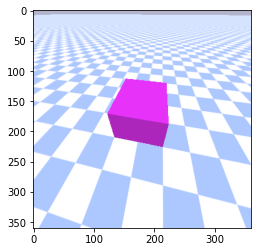

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import pybullet as p
import pybullet_data
p.connect(p.GUI)
for Obstacle, distance in zip([VoxelObstacle], [4]):
    plt.clf()
    plt.close('all')
    plt.imshow(create_image(Obstacle(), distance))
    plt.show()
p.disconnect()    